<a href="https://colab.research.google.com/github/rahhul/GANs/blob/master/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [18]:
# imports

import sys
assert sys.version_info >= (3, 5)

# Scikit Learn
import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Check GPU availaility
physical_devices = tf.config.list_logical_devices('GPU')
print("Num Devices: ", len(physical_devices))

# common imports
import numpy as np
import os

# set random seeds
np.random.seed(42)
tf.random.set_seed(42)

import matplotlib.pyplot as plt

Num Devices:  0


## PCA with a Linear Autoencoder

Synthetic 3D Dataset

In [0]:
# utility function to plot images

def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')

In [0]:
# helper function to create 3D dataset

np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

In [21]:
X_train = generate_3d_data(60)
X_train.shape

(60, 3)

In [0]:
from mpl_toolkits import mplot3d

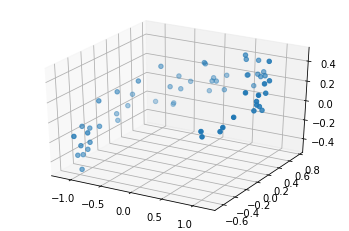

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2])